# Weather data analysis and forecasting 
This project aims to analyze the weather data of Chennai over the past 20 years. The data was collected from an API and analyzed to reveal various insights and patterns. Finally, weather forecasting is carried out by a variety of machine learning algorithms and the best algorithm is found.
## About Chennai and its Weather Changes.
Chennai is the capital city of the Indian state of Tamil Nadu. It is located on the east coast of India and has a tropical wet and dry climate. The city experiences heavy rainfall during the monsoon season, which lasts from October to December. The temperature in Chennai is generally high throughout the year, with the hottest months being May and June. The city also experiences occasional cyclones and floods due to its proximity to the Bay of Bengal.

## This project consist of several segments
- [Importing libraries](#importing-necessary-libraries)
- [Data collection](#data-collection)
- [Exploratory data analysis](#Exploratory-Data-Analysis)
- [Weather Forecasting using Machine Learning](#weather-forecasting)

----

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import requests


----

# Data collection

The data is being collected from the API (Application Programming Interface) `Open-Meteo`. APIs are mechanisms that enable two software components to communicate with each other using a set of definitions and protocols.

#### About Open-meteo
Open-Meteo API is an open-source weather API with free access for non-commercial use and  provides global weather data via API, including current weather data, forecasts, nowcasts and historical weather data for any geographical location.

- ### Calling an API and retrieving data

In [2]:
URL = 'https://archive-api.open-meteo.com/v1/archive?latitude=13.09&longitude=80.28&start_date=1980-01-01&end_date=2023-02-28&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours&timezone=auto'
data= requests.get(URL)


- ### Storing the data in json format


In [3]:
chennai = data.json()

- ### Creating a dataframe

In [4]:
df=pd.DataFrame(chennai['daily'])
df.head(10)


,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours
0,1980-01-01,27.4,18.2,22.8,0.0,0.0
1,1980-01-02,27.7,19.3,23.3,0.0,0.0
2,1980-01-03,27.7,18.7,23.3,0.0,0.0
3,1980-01-04,27.3,19.3,23.7,0.0,0.0
4,1980-01-05,27.9,22.4,24.7,0.0,0.0
5,1980-01-06,28.1,21.3,24.8,0.0,0.0
6,1980-01-07,28.0,22.2,24.9,0.0,0.0
7,1980-01-08,28.3,22.5,25.0,0.0,0.0
8,1980-01-09,27.3,21.3,24.1,0.3,2.0
9,1980-01-10,27.2,21.0,23.6,0.0,0.0


In [5]:
df.tail(10)

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours
15755,2023-02-19,29.7,21.2,25.1,0.0,0.0
15756,2023-02-20,30.6,19.5,24.6,0.0,0.0
15757,2023-02-21,31.1,18.4,24.9,0.0,0.0
15758,2023-02-22,30.6,18.8,24.8,0.0,0.0
15759,2023-02-23,30.4,18.7,24.5,0.0,0.0
15760,2023-02-24,30.3,19.2,24.4,0.0,0.0
15761,2023-02-25,30.5,17.9,24.1,0.0,0.0
15762,2023-02-26,29.7,18.7,24.3,0.0,0.0
15763,2023-02-27,30.9,18.7,24.9,0.0,0.0
15764,2023-02-28,30.4,21.5,26.1,0.0,0.0


# Exploratory Data Analysis


- #### Getting shape of the dataframe

In [6]:
df.shape

(15765, 6)

> This dataset consist of `15765` rows and `6` columns.

- #### Getting column names

In [7]:
df.columns

Index(['time', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'rain_sum', 'precipitation_hours'],
      dtype='object')

- #### Getting info about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 15765 non-null  object 
 1   temperature_2m_max   15765 non-null  float64
 2   temperature_2m_min   15765 non-null  float64
 3   temperature_2m_mean  15765 non-null  float64
 4   rain_sum             15765 non-null  float64
 5   precipitation_hours  15765 non-null  float64
dtypes: float64(5), object(1)
memory usage: 739.1+ KB


- #### Getting datatypes

In [9]:
df.dtypes

time                    object
temperature_2m_max     float64
temperature_2m_min     float64
temperature_2m_mean    float64
rain_sum               float64
precipitation_hours    float64
dtype: object

- #### Checking for null values

In [10]:
df.isnull().sum()

time                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
precipitation_hours    0
dtype: int64

> Seems like there is no null/empty cells.

- #### Checking for duplicated cells

In [11]:
df.duplicated().sum()

0

> There aren't any duplicated cells.

- #### Dataframe summary

In [12]:
pd.DataFrame({'unique':df.nunique(),
              'missing': df.isna().sum()/df.count(),
              'type':df.dtypes})

,unique,missing,type
time,15765,0.0,object
temperature_2m_max,181,0.0,float64
temperature_2m_min,164,0.0,float64
temperature_2m_mean,144,0.0,float64
rain_sum,453,0.0,float64
precipitation_hours,25,0.0,float64


# Data Cleaning

### Changing column names 

In [13]:
df.rename(columns={'temperature_2m_max':'max_temp','temperature_2m_min':'min_temp','temperature_2m_mean':'mean_temp'},inplace=True)

### Setting `time` column as index

- Changing datatype of time column

In [14]:
df['time']=pd.to_datetime(df['time'])

In [15]:
df.dtypes

time                   datetime64[ns]
max_temp                      float64
min_temp                      float64
mean_temp                     float64
rain_sum                      float64
precipitation_hours           float64
dtype: object

In [16]:
df.set_index('time',inplace=True)
df

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours
time,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0
1980-01-02,27.7,19.3,23.3,0.0,0.0
1980-01-03,27.7,18.7,23.3,0.0,0.0
1980-01-04,27.3,19.3,23.7,0.0,0.0
1980-01-05,27.9,22.4,24.7,0.0,0.0
...,...,...,...,...,...
2023-02-24,30.3,19.2,24.4,0.0,0.0
2023-02-25,30.5,17.9,24.1,0.0,0.0
2023-02-26,29.7,18.7,24.3,0.0,0.0


---
# Exploratory Data Analysis

- #### Statistical Description

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,15765.0,31.840419,3.430826,21.8,28.7,32.0,34.5,42.5
min_temp,15765.0,24.790301,2.759432,15.0,23.0,25.1,26.9,31.8
mean_temp,15765.0,27.804675,2.704417,20.4,25.4,28.0,29.9,35.6
rain_sum,15765.0,2.653644,8.058042,0.0,0.0,0.0,1.6,231.8
precipitation_hours,15765.0,3.538979,5.896206,0.0,0.0,0.0,5.0,24.0


> This table gives statistical description of all variables in the data frame.

- #### Correlation Matrix

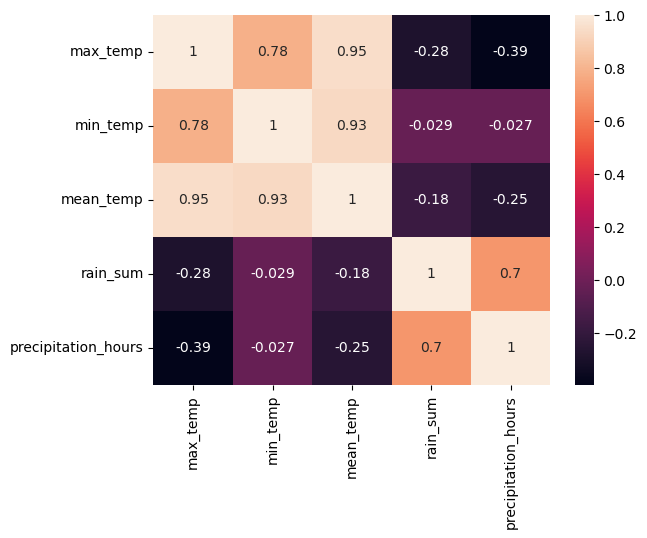

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

- #### Pairplot between all variables.

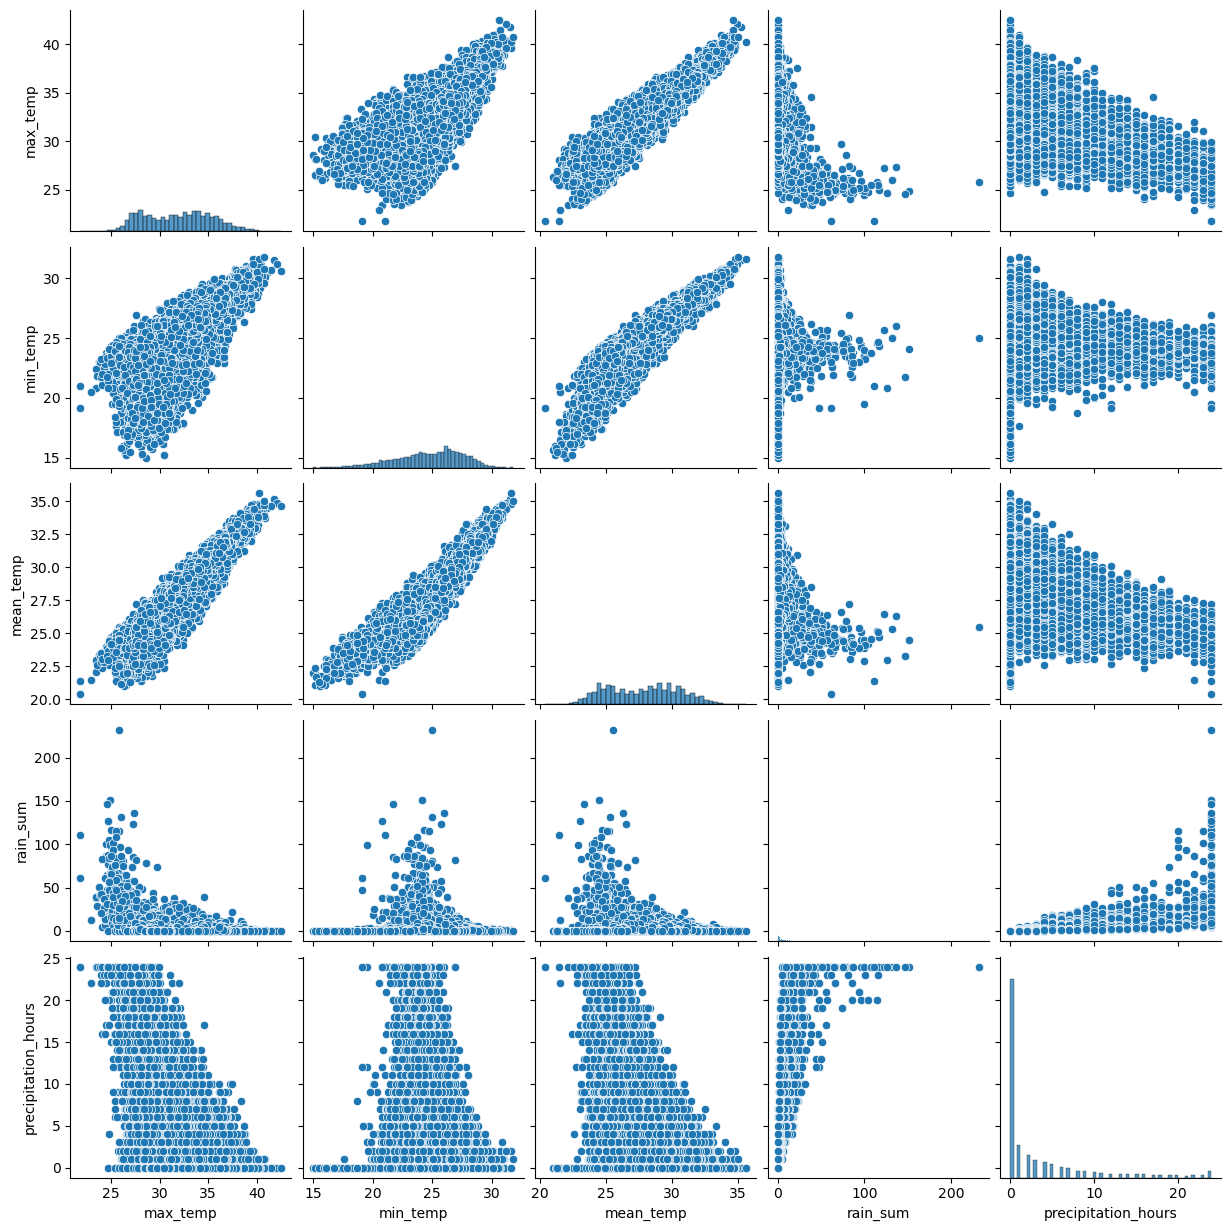

In [19]:
sns.pairplot(df)
plt.show()

> This heat map and pair plot shows the correlation among all variables. 
- `max_temp`, `min_temp` and `mean_temp` have a positive correlation.
- Likewise, `rain_sum` and `precipitation_hours` have a positive correlation.

- #### Distribution of `rain_sum`

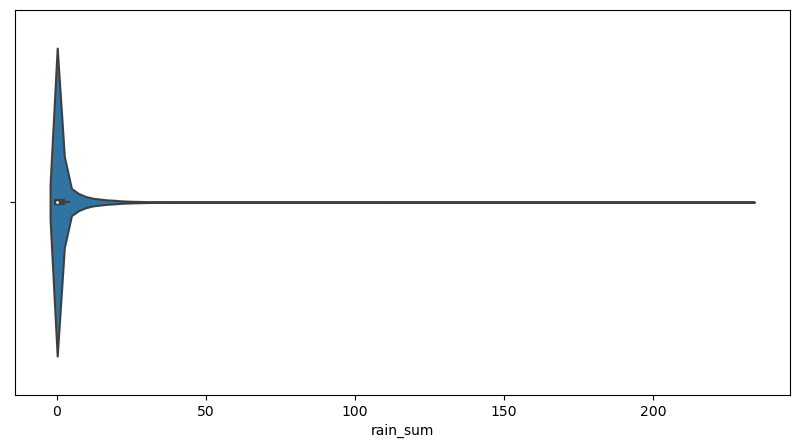

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.rain_sum)
plt.show()

- #### Distribution of `maximum_temperature`

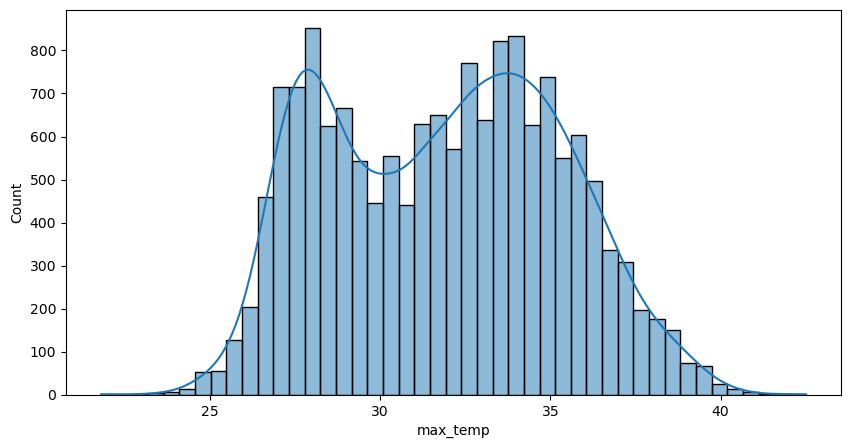

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['max_temp'],kde=True)
plt.show()

The maximum temperature occurs most frequently at `27-28°C` and `33-34°C`.

- #### Distribution of `minimum_temperature`

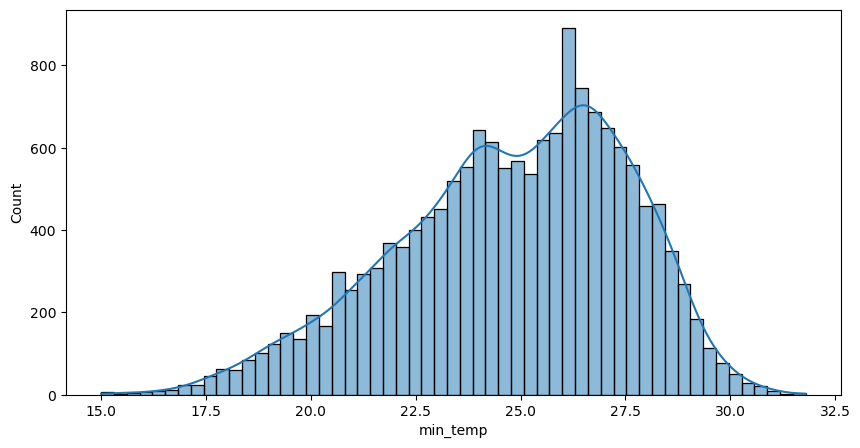

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['min_temp'],kde=True)
plt.show()

The minimum temperature occurs most frequently at  `25.5-27.5°C` .

- #### Distribution of `mean_temperature`

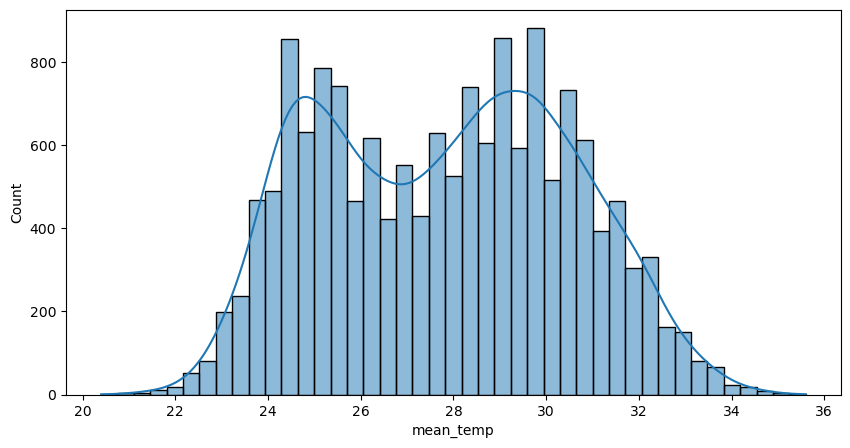

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['mean_temp'],kde=True)
plt.show()

The mean temperature occurs most frequently at  `24-26°C` and `28-30°C` .

- #### Distribution comparison of `max_temp`,`mean_temp` and `min_temp`.

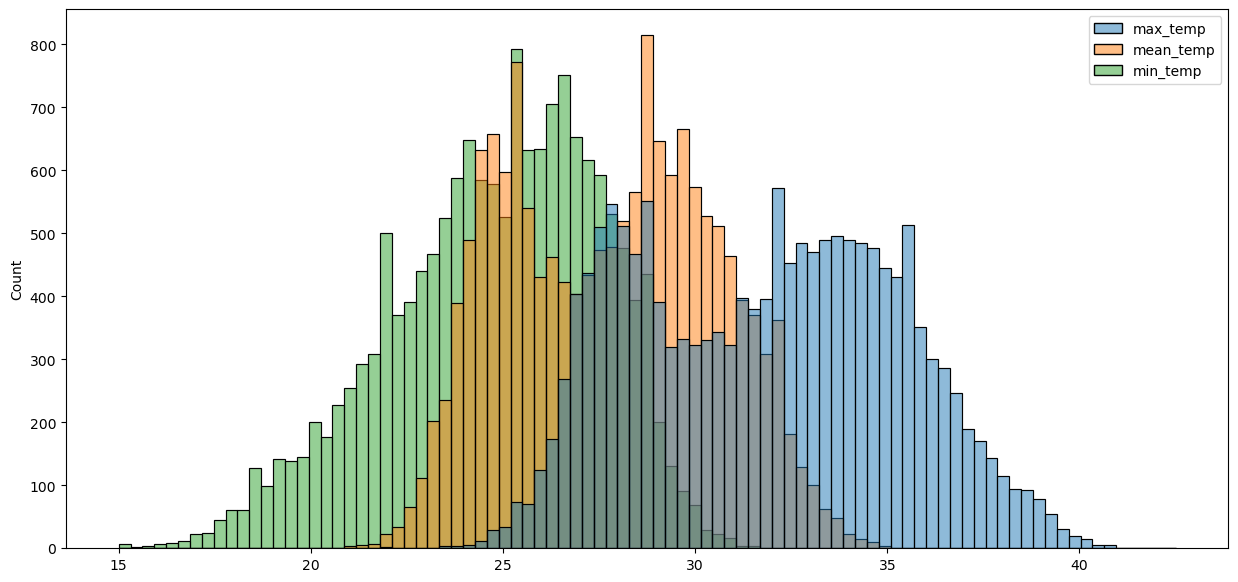

In [24]:
plt.figure(figsize=(15,7))
sns.histplot(df[['max_temp','mean_temp','min_temp']])
plt.show()

- #### Distribution of precipitation Hours

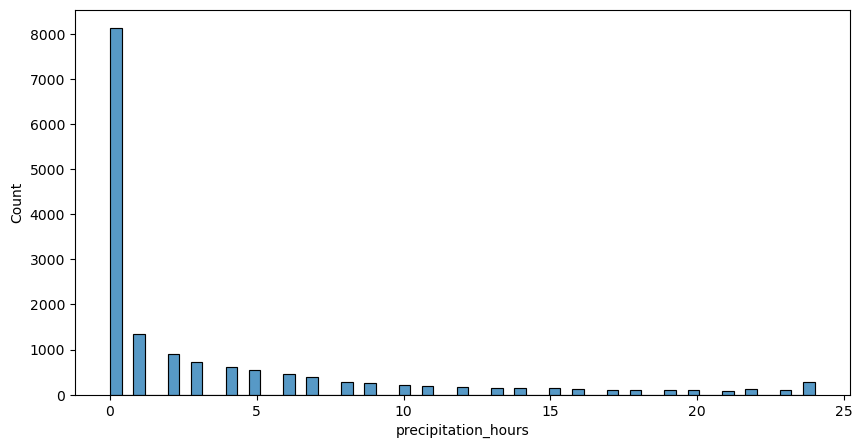

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['precipitation_hours'])
plt.show()

This plot shows the distribution of `precipitation_hours`. 

---

- #### Years with maximum rainfall days

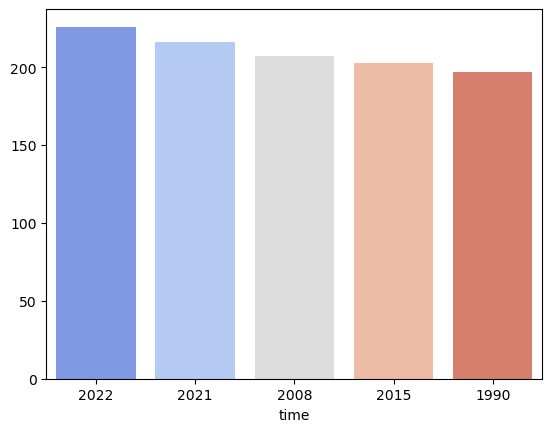

In [26]:
max_day_rain=df[df['rain_sum']!=0.0].groupby(by=df[df['rain_sum']!=0.0].index.year)['rain_sum'].count()
max_day_rain=max_day_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_rain.index,y=max_day_rain.values,order=max_day_rain.index,palette='coolwarm')
plt.show()

`2022` has maximum rainy days followed by `2021` and `2008`.

---


- #### Years with maximum days without rainfall

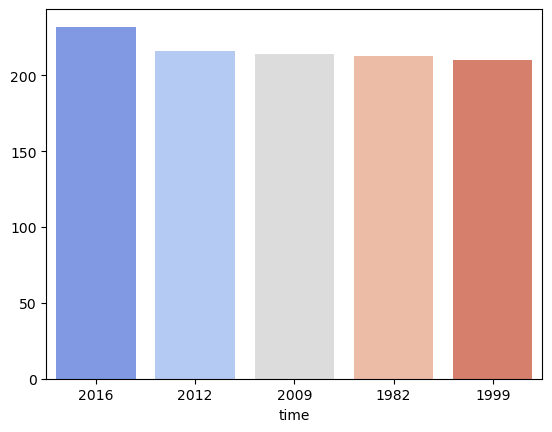

In [27]:
max_day_without_rain=df[df['rain_sum']==0.0].groupby(by=df[df['rain_sum']==0.0].index.year)['rain_sum'].count()
max_day_without_rain=max_day_without_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_without_rain.index,y=max_day_without_rain.values,order=max_day_without_rain.index,palette='coolwarm')
plt.show()

`2016` has maximum non-rainy days followed by `2012` and `2009`.

---

- #### Years with more precipitatiion hours

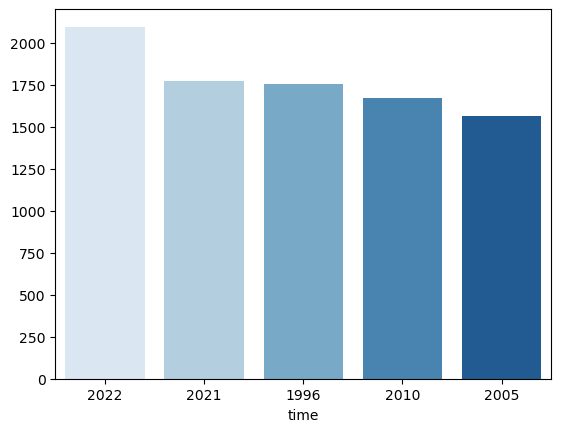

In [28]:
max_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
max_precp_hours=max_precp_hours.sort_values(ascending=False).head()
sns.barplot(x= max_precp_hours.index,y=max_precp_hours.values,order=max_precp_hours.index,palette='Blues')
plt.show()

`2022` has the most precipitation hours followed by `2021` and `1996`.

---

- #### Years with less precipitatiion hours

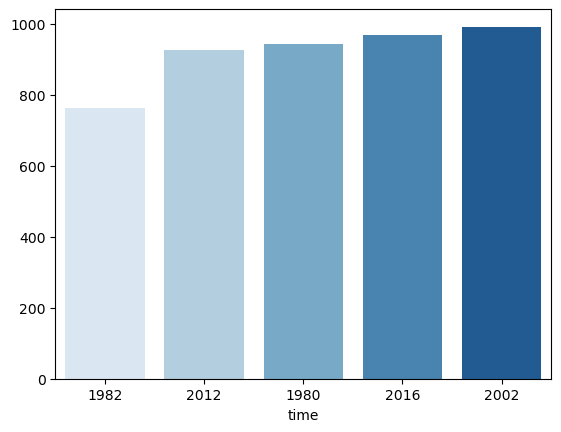

In [29]:
min_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
min_precp_hours=min_precp_hours.loc[:2022].sort_values(ascending=True).head()
sns.barplot(x= min_precp_hours.index,y=min_precp_hours.values,order=min_precp_hours.index,palette='Blues')
plt.show()

`1982` has the least precipitation hours followed by `2012` and `1980`.

---

- #### Years with highest rainfall

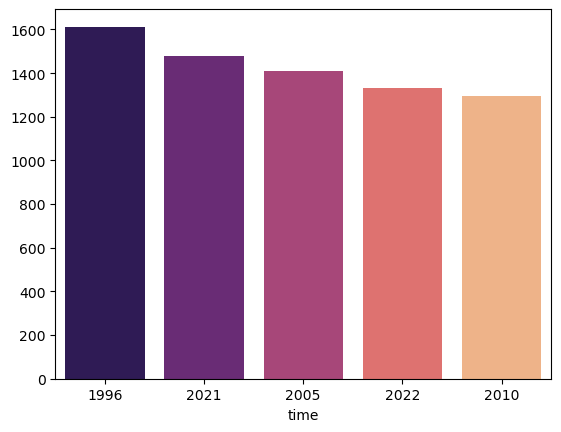

In [30]:
max_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
max_rain_sum=max_rain_sum.sort_values(ascending=False).head()
sns.barplot(x= max_rain_sum.index,y=max_rain_sum.values,order=max_rain_sum.index,palette='magma')
plt.show()

`1996` has the highest total rainfall followed by `2021` and `2005`.

----

- #### Years with lowest rainfall

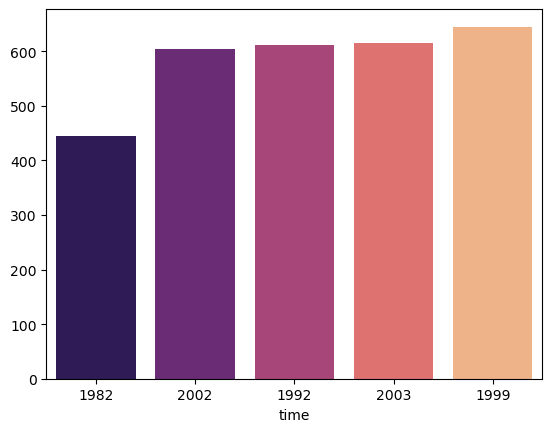

In [31]:
min_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
min_rain_sum=min_rain_sum.loc[:2022].sort_values().head()
sns.barplot(x= min_rain_sum.index,y=min_rain_sum.values,order=min_rain_sum.index,palette='magma')
plt.show()

`1982` has the lowest total rainfall followed by `2002` and `1992`.

----

- #### Percentage of rainy days and non-rain days

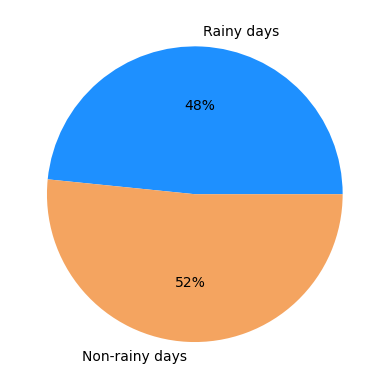

In [32]:
rain_days=df['rain_sum'][
df['rain_sum']!=0.0].count()
non_rain_days=df['rain_sum'][df['rain_sum']==0.0].count()
plt.pie([rain_days,non_rain_days],labels=['Rainy days','Non-rainy days'],autopct='%.0f%%',colors=['dodgerblue','sandybrown'])
plt.show()

In the past 23 years, `48%` of days were rainy and `52%` of non_rainy days.

---

- #### Rainfall trend over years

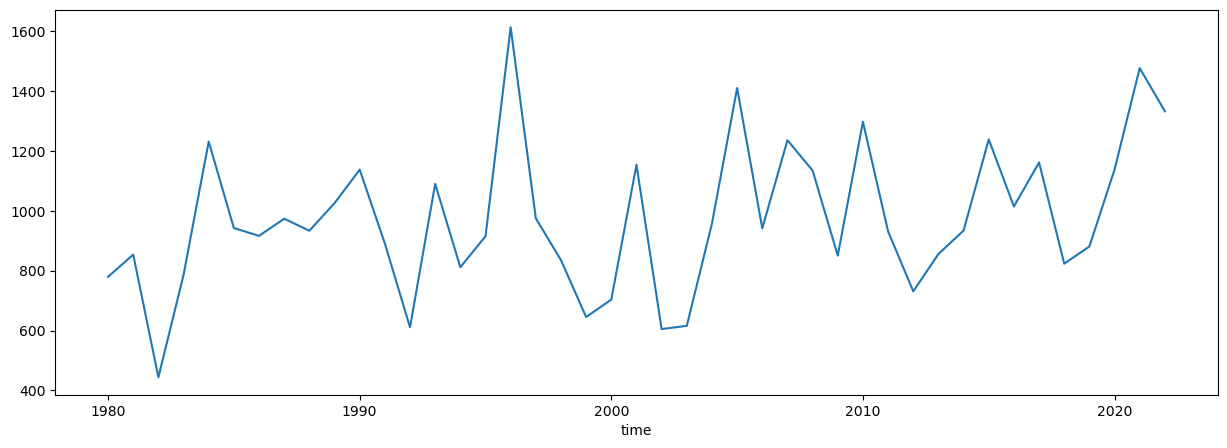

In [33]:
plt.figure(figsize=(15,5))
rainfall_trend=df[:'2022'].groupby(df[:'2022'].index.year)['rain_sum'].sum()
sns.lineplot(x=rainfall_trend.index,y=rainfall_trend.values)
plt.show()

This` trend chart` shows the fluctuations amd the variations in` total rainfall` over past 23 years.

---

- #### Highest of max_temp

In [34]:
df[df['max_temp']==df['max_temp'].max()]['max_temp']

time
1980-05-24    42.5
Name: max_temp, dtype: float64

The highest maximum temperature in Chennai is `42.5°C` that occurred on `24th of May 1980`.

- #### Minimum of max_temp

In [35]:
df[df['max_temp']==df['max_temp'].min()]['max_temp']

time
1980-12-05    21.8
2022-11-21    21.8
Name: max_temp, dtype: float64

The lowest maximum temperature in Chennai is `21.8°C` that occurred on `5th of December 1980` and `21st of November 2022`.


----
- #### Highest of min_temp


In [36]:
df[df['min_temp']==df['min_temp'].max()]['min_temp']

time
2017-05-18    31.8
Name: min_temp, dtype: float64

The highest of minimum temperature in Chennai is `31.8`, which occured on `18th of May 2017`.

---

- #### Lowest of min_temp

In [37]:
df[df['min_temp']==df['min_temp'].min()]['min_temp']

time
1989-02-03    15.0
Name: min_temp, dtype: float64

The lowest of minimum temperature in Chennai is `15°C`, which occured on `3rd of february 1989`.

---

- #### Temperature trend

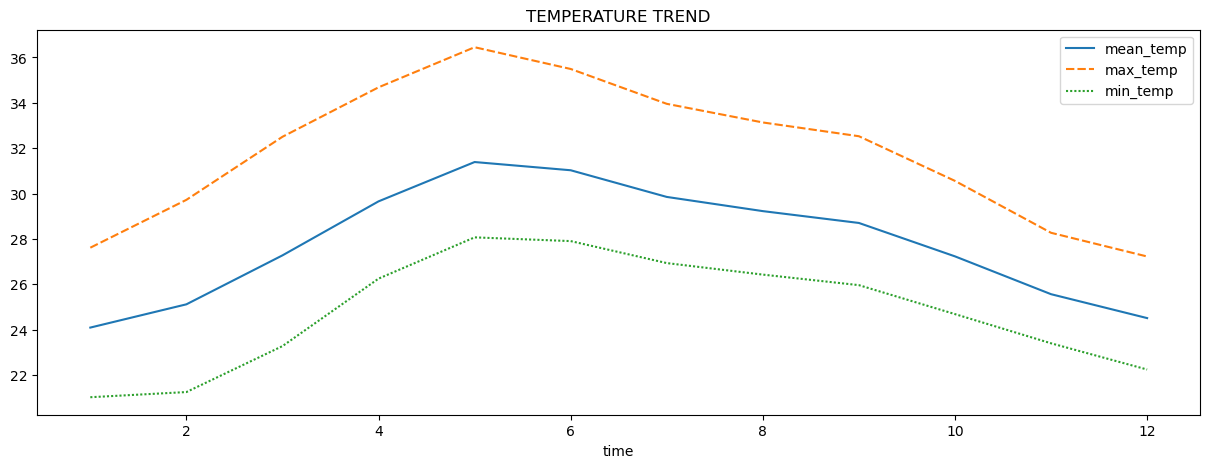

In [38]:
plt.figure(figsize=(15,5))
plt.title('TEMPERATURE TREND')
temp_trend=df.groupby(df.index.month)[['mean_temp','max_temp','min_temp']].mean()
sns.lineplot(temp_trend)
plt.show()

This line plot shows the trend of maximum temperature, mean temperature and minimum temperature.
-  The temperature gradually increases during the month of `February`.
- Attains peak during the month of `May` and `June`.
- And then decreases gradually .

----

## Analysis of weather data for year `2022`

- #### Temperature trend of year `2022`

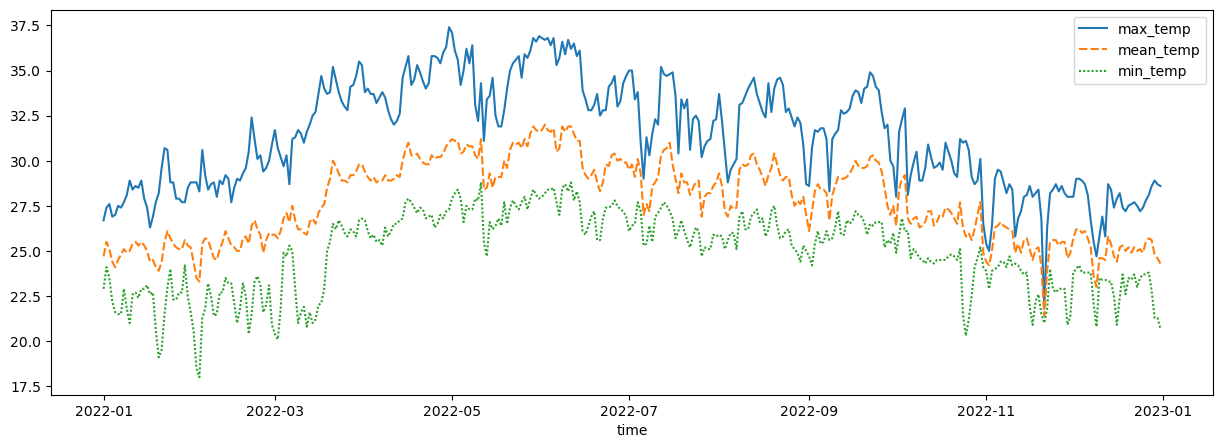

In [39]:
plt.figure(figsize=(15,5))
year_2022=df[df.index.year==2022]
sns.lineplot(year_2022[['max_temp','mean_temp','min_temp']])
plt.show()

This chart gives the trend of `minimum`, `maximum` and `mean` temperature during the year `2022`.

---

- #### Heatmap of mean temperature for year `2022`

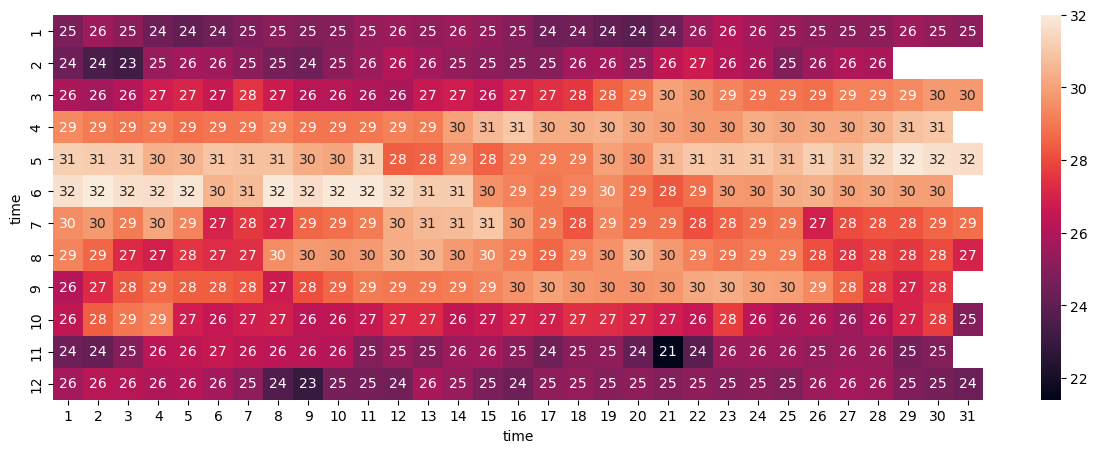

In [40]:
plt.figure(figsize=(15,5))
temp_heatmap_2022=year_2022.pivot_table(index=year_2022.index.month,columns=year_2022.index.day,values='mean_temp')
sns.heatmap(temp_heatmap_2022,annot=True)
plt.show()

- In `2022`, the mean temperature is comparatively high during the month of `April`, `May`, `June` and low during the month of `January`, `February`, `November`, `December`.  

---

- ### Maximum Temperature of year `2022`

In [41]:
max_temp_2022=year_2022['max_temp'].max()
year_2022['max_temp'][year_2022['max_temp']==year_2022['max_temp'].max()]

time
2022-04-30    37.4
Name: max_temp, dtype: float64

---
- ### Minimum Temperature of year `2022`

In [42]:
min_temp_2022=year_2022['min_temp'].min()
year_2022['min_temp'][year_2022['min_temp']==year_2022['min_temp'].min()]

time
2022-02-03    18.0
Name: min_temp, dtype: float64

---
- ### Rainfall trend of year `2022`

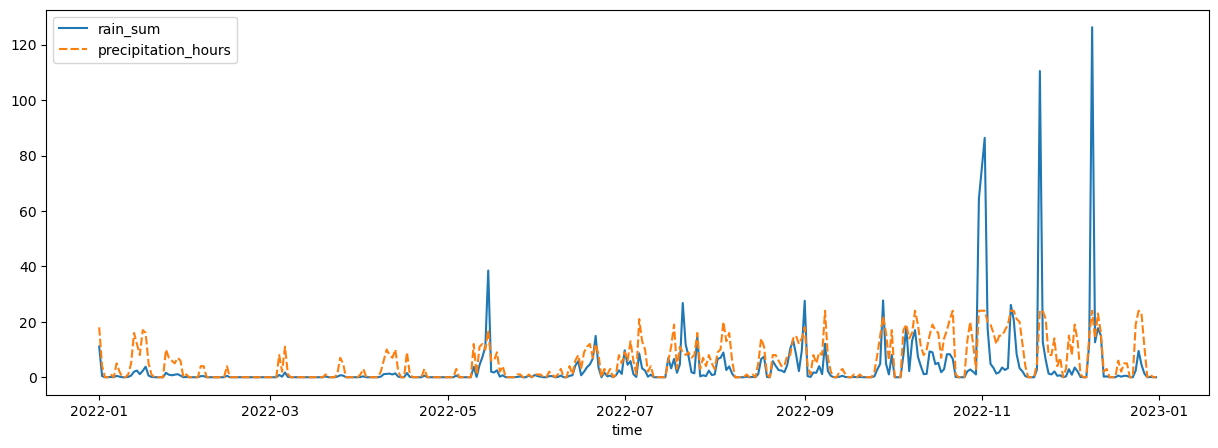

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(year_2022[['rain_sum','precipitation_hours']])
plt.show()

This chart shows the trend of `rainfall` and `precipitation hours` for the yearr `2022`.

---

- #### Overall summary of the year `2022`.


In [44]:
rain_sum_2022= year_2022['rain_sum'].sum()
prec_hrs_sum_2022= year_2022['precipitation_hours'].sum()

In [45]:
pd.DataFrame(
    {'maximum_Temperature (°C)':max_temp_2022,
     'minimum_Temperature (°C)':min_temp_2022, 
     'Total_Precipitation (mm)':rain_sum_2022,
     'Total_Precipitation_hours (hrs)':prec_hrs_sum_2022},index=[0])

,maximum_Temperature (°C),minimum_Temperature (°C),Total_Precipitation (mm),Total_Precipitation_hours (hrs)
0,37.4,18.0,1332.1,2095.0


This gives the overall summary of weather for the year `2022`.

----

# Weather Forecasting

In this project, we are going to predict the next day's mean temperature based on previous days' maximum, minimum and mean temperature. This is going to be done by machine learning by building various models using different algorithms such as multiple linear regression, decision tree regressor, random forest regressor.

---
## Data Preprocessing

#### Creating a dataframe copy.

In [46]:
df2 = df.copy()

#### Creating a target variable `temp`.

This variable consist of next day's mean temperature.

In [47]:
df2['temp']=df['mean_temp'].shift(-1)
df2 = df2[:-1]
df2

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0,23.3
1980-01-02,27.7,19.3,23.3,0.0,0.0,23.3
1980-01-03,27.7,18.7,23.3,0.0,0.0,23.7
1980-01-04,27.3,19.3,23.7,0.0,0.0,24.7
1980-01-05,27.9,22.4,24.7,0.0,0.0,24.8
...,...,...,...,...,...,...
2023-02-23,30.4,18.7,24.5,0.0,0.0,24.4
2023-02-24,30.3,19.2,24.4,0.0,0.0,24.1
2023-02-25,30.5,17.9,24.1,0.0,0.0,24.3


---
### Splitting dataset into train and test set.

Here this dataset consist of `timeseries` data ,the data up to year 2020 for the training set and from 2021 to 2023(February
) as the test set. This ensures that the model is trained on past data and tested on future data.


#### Train set

In [48]:
x=df2.loc[:'2020-12-31']
x

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0,23.3
1980-01-02,27.7,19.3,23.3,0.0,0.0,23.3
1980-01-03,27.7,18.7,23.3,0.0,0.0,23.7
1980-01-04,27.3,19.3,23.7,0.0,0.0,24.7
1980-01-05,27.9,22.4,24.7,0.0,0.0,24.8
...,...,...,...,...,...,...
2020-12-27,27.4,22.4,24.6,0.0,0.0,24.3
2020-12-28,27.0,21.5,24.3,0.0,0.0,25.2
2020-12-29,27.0,23.6,25.2,0.0,0.0,24.7


#### Test set

In [49]:
y= df2.loc['2021-01-01':]
y

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
2021-01-01,26.8,23.5,24.8,0.0,0.0,24.2
2021-01-02,25.8,23.6,24.2,8.9,15.0,25.2
2021-01-03,26.5,24.4,25.2,3.4,13.0,25.1
2021-01-04,27.3,23.3,25.1,1.5,8.0,24.4
2021-01-05,26.6,23.7,24.4,51.5,24.0,24.8
...,...,...,...,...,...,...
2023-02-23,30.4,18.7,24.5,0.0,0.0,24.4
2023-02-24,30.3,19.2,24.4,0.0,0.0,24.1
2023-02-25,30.5,17.9,24.1,0.0,0.0,24.3


---
### Building machine learning model.

#### Linear regression model

Multiple linear regression is a statistical method that models the relationship between a dependent variable and multiple independent variables. 


$$ y = mx1 + mx2+ mx3+....+ b $$

    - y is the dependent variable
    - x is the independent variable
    - m is the slope of the regression

- Training the model with training data.

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

LinearRegression()

- Pedicting the result using trained model

In [51]:
temp_pred_1 = reg.predict(y[['max_temp','min_temp','mean_temp']])
temp_pred_1[:5]

array([24.80024357, 24.18630681, 25.16060388, 25.11308956, 24.39106378])

In [52]:
temp_actual = y['temp']
temp_actual.head()

time
2021-01-01    24.2
2021-01-02    25.2
2021-01-03    25.1
2021-01-04    24.4
2021-01-05    24.8
Name: temp, dtype: float64

In [53]:
comparison=pd.DataFrame(temp_actual)
comparison['predicted']=temp_pred_1.tolist()
comparison.loc['2021-05']


,temp,predicted
time,,
2021-05-01,29.7,29.905726
2021-05-02,29.7,29.624716
2021-05-03,29.5,29.625204
2021-05-04,29.7,29.429106
2021-05-05,30.0,29.633696
2021-05-06,29.6,29.946054
2021-05-07,29.8,29.521200
2021-05-08,29.9,29.739665
2021-05-09,30.2,29.831104


- Checking the accuracy of the prediction.

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(temp_actual, temp_pred_1)
mae = mean_absolute_error(temp_actual, temp_pred_1)
r2 = r2_score(temp_actual, temp_pred_1)
rmse = np.sqrt(mse)

In [77]:
reg_metrics=[mse,mae,r2,rmse]
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("RMSE:", rmse)

MSE: 0.4068942656777141
MAE: 0.4682291752541946
R-squared: 0.9293210294860885
RMSE: 0.6378826425587344


- Plotting a scatter plot between Predicted value and actual value.

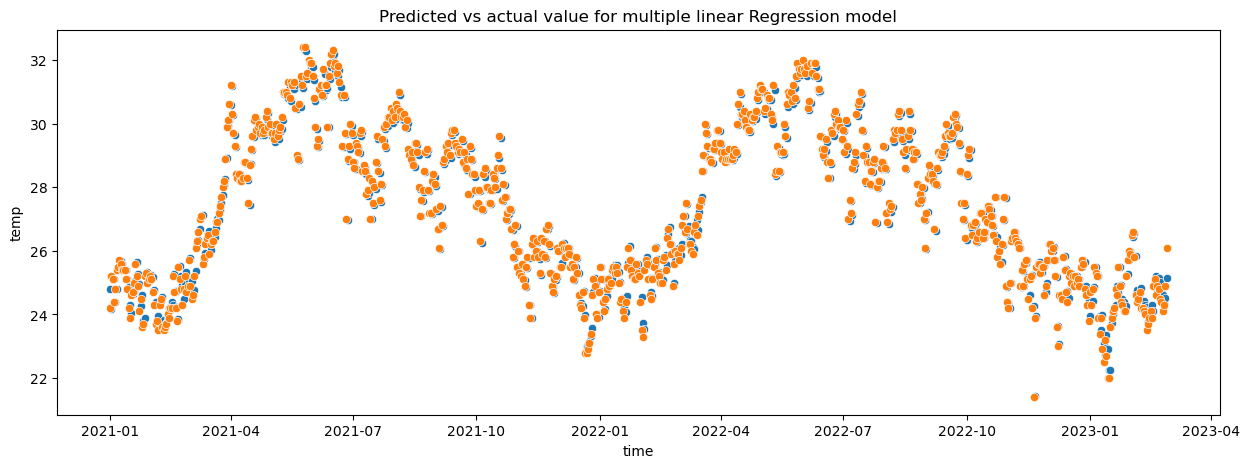

In [56]:
plt.figure(figsize=(15,5))
plt.title('Predicted vs actual value for multiple linear Regression model')
sns.scatterplot(x=y.index,y=temp_pred_1)
sns.scatterplot(x=y.index,y=temp_actual)
plt.show()

This scatter plot shows the variation between `actual` and `predicted` value.


---
#### Decision Tree regressor Model
- Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.
- This below picture shows an example of working of the Decision tree regressor.

<p align="center">
<img src="https://res.cloudinary.com/startup-grind/image/upload/c_fill,dpr_2.0,f_auto,g_center,h_1080,q_100,w_1080/v1/gcs/platform-data-dsc/events/decision-tree_lyM106A.png"  width="310" height="300">
</p>

- Training the model with training data.

In [71]:
from sklearn.tree import DecisionTreeRegressor
decisionReg= DecisionTreeRegressor()
decisionReg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

DecisionTreeRegressor()

- Pedicting the result using trained model

In [60]:
temp_pred_2=decisionReg.predict(y[['max_temp','min_temp','mean_temp']])
temp_pred_2[:5]

array([25.3, 23.9, 25.4, 24.4, 24.8])

- Evaluating the model

In [86]:
mse = mean_squared_error(temp_actual, temp_pred_2)
mae = mean_absolute_error(temp_actual, temp_pred_2)
r2 = r2_score(temp_actual, temp_pred_2)
rmse = np.sqrt(mse)

In [80]:
decisionReg_metrics=[mse,mae,r2,rmse]
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("RMSE:", rmse)

MSE: 0.8147478003384095
MAE: 0.6690693739424705
R-squared: 0.8584754305630741
RMSE: 0.9026338129819919


- Plotting a scatter plot between Predicted value and actual value.

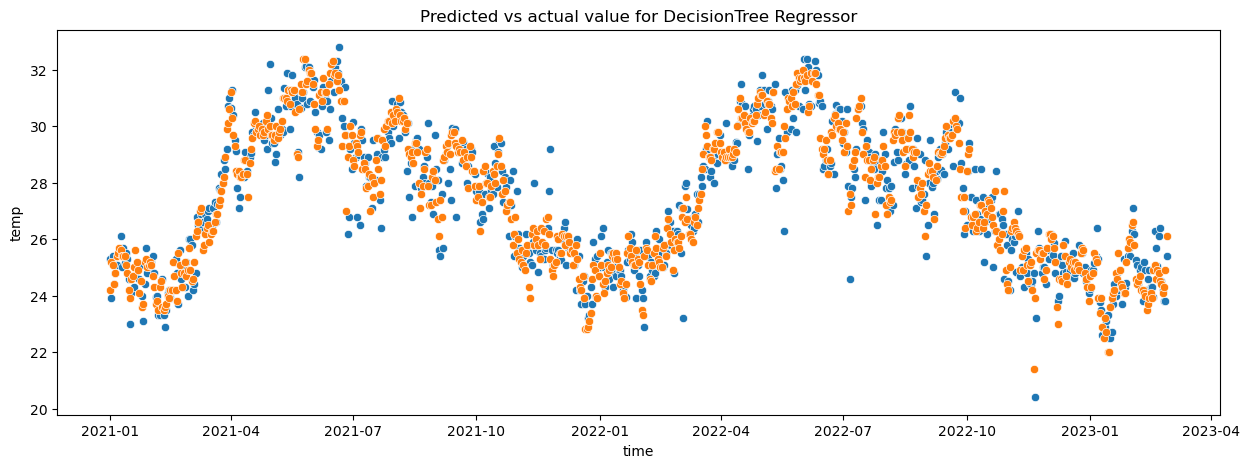

In [63]:
plt.figure(figsize=(15,5))
plt.title('Predicted vs actual value for DecisionTree Regressor')
sns.scatterplot(x=y.index,y=temp_pred_2)
sns.scatterplot(x=y.index,y=temp_actual)
plt.show()

This scatter plot shows the variation between `actual` and `predicted` value.


---
#### Random Forest Model

- Random Forest Regression is a supervised learning algorithm that is based on the ensemble learning method and many Decision Trees. It can be used to solve both Classification and Regression tasks. In Random Forest Regression, multiple decision trees are created and their output is averaged to give the final result. It is known to produce very robust results by avoiding overfitting.
- This below picture shows an example of how the Random Forest regressor works.
<p align = "center">
<img src= "https://miro.medium.com/v2/resize:fit:828/format:webp/1*ZFuMI_HrI3jt2Wlay73IUQ.png"  width="550" height="400">
</p>


- Training the model with training data.

In [72]:
from sklearn.ensemble import RandomForestRegressor
randreg=RandomForestRegressor()
randreg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

RandomForestRegressor()

- Pedicting the result using trained model

In [66]:
temp_pred_3=randreg.predict(y[['max_temp','min_temp','mean_temp']])
temp_pred_3[:5]

array([25.2437    , 24.4015    , 25.988     , 24.64497619, 24.37666667])

- Evaluating the model

In [82]:
mse = mean_squared_error(temp_actual, temp_pred_3)
mae = mean_absolute_error(temp_actual, temp_pred_3)
r2 = r2_score(temp_actual, temp_pred_3)
rmse = np.sqrt(mse)

In [84]:
randreg_metrics=[mse,mae,r2,rmse]
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("RMSE:", rmse)

MSE: 0.4730568693083167
MAE: 0.5200183279953268
R-squared: 0.9178283516442364
RMSE: 0.6877912977846672


- Plotting a scatter plot between Predicted value and actual value.

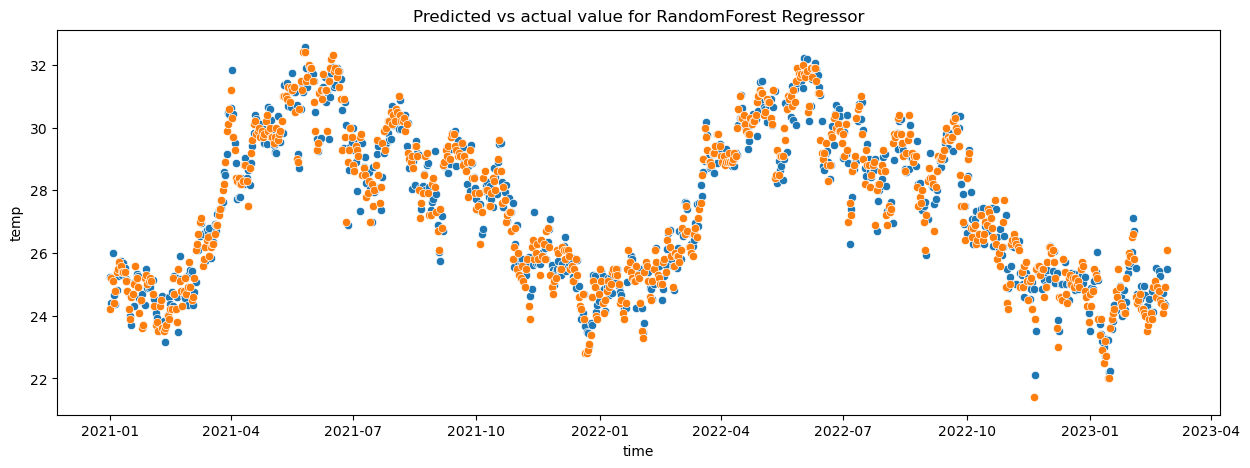

In [69]:
plt.figure(figsize=(15,5))
plt.title('Predicted vs actual value for RandomForest Regressor')
sns.scatterplot(x=y.index,y=temp_pred_3)
sns.scatterplot(x=y.index,y=temp_actual)
plt.show()

This scatter plot shows the variation between `actual` and `predicted` value.


---
## Comparing the evaluation metrics 

In [89]:
pd.DataFrame({"linear_regressor":reg_metrics,"Decision_tree_regressor": decisionReg_metrics, "RandomForest_regressor":randreg_metrics },index=['mse','mae','r2','rmse'])

,linear_regressor,Decision_tree_regressor,RandomForest_regressor
mse,0.406894,0.814748,0.473057
mae,0.468229,0.669069,0.520018
r2,0.929321,0.858475,0.917828
rmse,0.637883,0.902634,0.687791


Based on these scores, it seems that `Multiple Linear Regressiom` model is performing well. The R-squared score of 0.93 indicates that this model explains `93%` of the variance in the target variable. The MSE and RMSE scores are also relatively low, which indicates that our model’s predictions are close to the actual values.